
Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти
Невірний тип даних!

Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти
Тензор 'Flowers' не знайдено.

Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти
Тензор 'Flowers' створено.

Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти
Значення тензора 'Flowers':
[1. 2. 3. 4. 5. 6. 7. 8.]

Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти


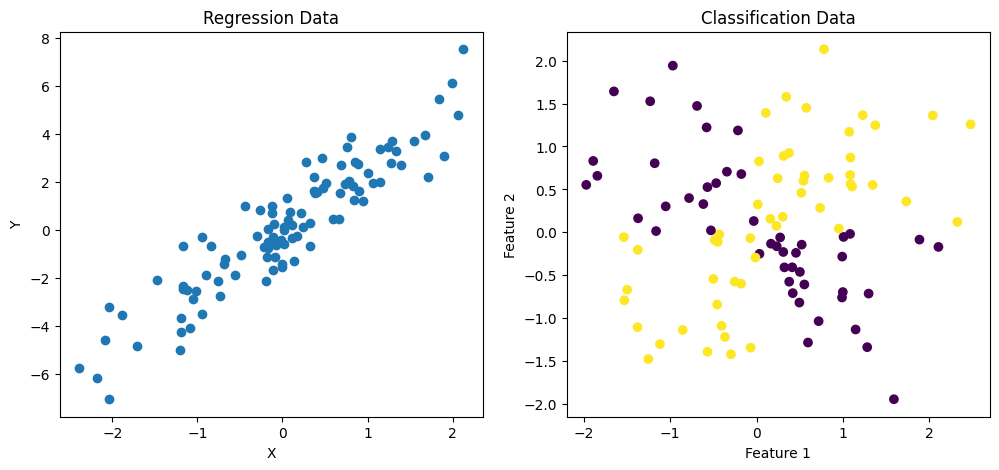


Меню:
1. Додати тензор
2. Переглянути тензор
3. Оновити тензор
4. Видалити тензор
5. Генерувати дані для регресії та класифікації
6. Вийти
Програма завершена.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Функція для введення даних користувачем
def input_data():
    data_type = input("Введіть тип даних (scalar, vector, matrix): ").strip().lower()
    if data_type == "scalar":
        value = float(input("Введіть скалярне значення: "))
        tensor = tf.constant(value)
    elif data_type == "vector":
        values = input("Введіть елементи вектора через кому: ")
        tensor = tf.constant([float(x) for x in values.split(',')])
    elif data_type == "matrix":
        rows = int(input("Введіть кількість рядків матриці: "))
        matrix = []
        for i in range(rows):
            row = input(f"Введіть елементи рядка {i+1} через кому: ")
            matrix.append([float(x) for x in row.split(',')])
        tensor = tf.constant(matrix)
    else:
        print("Невірний тип даних!")
        return None
    return tensor

# CRUD операції
class TensorCRUD:
    def __init__(self):
        self.data = {}

    def create(self, name, tensor):
        self.data[name] = tensor
        print(f"Тензор '{name}' створено.")

    def read(self, name):
        tensor = self.data.get(name)
        if tensor is not None:
            print(f"Значення тензора '{name}':\n{tensor.numpy()}")
        else:
            print(f"Тензор '{name}' не знайдено.")

    def update(self, name):
        if name in self.data:
            print(f"Оновлюємо тензор '{name}'.")
            tensor = input_data()
            if tensor is not None:
                self.data[name] = tensor
                print(f"Тензор '{name}' оновлено.")
        else:
            print(f"Тензор '{name}' не знайдено для оновлення.")

    def delete(self, name):
        if name in self.data:
            del self.data[name]
            print(f"Тензор '{name}' видалено.")
        else:
            print(f"Тензор '{name}' не знайдено для видалення.")

# Функція для генерації даних регресії та класифікації
def generate_data():
    x_train = tf.random.normal((100,))
    y_train = 2.5 * x_train + tf.random.normal((100,))
    x_class = tf.random.normal((100, 2))
    y_class = tf.cast(x_class[:, 0] * x_class[:, 1] > 0, tf.int32)
    return (x_train, y_train), (x_class, y_class)

# Функція для візуалізації даних
def plot_data(x_train, y_train, x_class, y_class):
    plt.figure(figsize=(12, 5))
    
    # Регресія
    plt.subplot(1, 2, 1)
    plt.scatter(x_train, y_train)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Regression Data")

    # Класифікація
    plt.subplot(1, 2, 2)
    plt.scatter(x_class[:, 0], x_class[:, 1], c=y_class, cmap='viridis')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Classification Data")

    plt.show()

# Основна програма
crud = TensorCRUD()

while True:
    print("\nМеню:")
    print("1. Додати тензор")
    print("2. Переглянути тензор")
    print("3. Оновити тензор")
    print("4. Видалити тензор")
    print("5. Генерувати дані для регресії та класифікації")
    print("6. Вийти")
    
    choice = input("Виберіть дію: ").strip()
    
    if choice == "1":
        name = input("Введіть ім'я для нового тензора: ").strip()
        tensor = input_data()
        if tensor is not None:
            crud.create(name, tensor)
    
    elif choice == "2":
        name = input("Введіть ім'я тензора для перегляду: ").strip()
        crud.read(name)
    
    elif choice == "3":
        name = input("Введіть ім'я тензора для оновлення: ").strip()
        crud.update(name)
    
    elif choice == "4":
        name = input("Введіть ім'я тензора для видалення: ").strip()
        crud.delete(name)
    
    elif choice == "5":
        (x_train, y_train), (x_class, y_class) = generate_data()
        plot_data(x_train, y_train, x_class, y_class)
    
    elif choice == "6":
        print("Програма завершена.")
        break
    
    else:
        print("Невірний вибір. Спробуйте ще раз.")
